# Keras: Model-Apis

In [11]:
import tensorflow as tf

# tf.Variable, tf.Module, tf.GradientTape
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Input, Concatenate
from tensorflow.keras.models import Sequential, Model # tf.keras.modles.Model -> tf.Module
import tensorflow.keras.backend as K

from sklearn.decomposition import PCA

import requests
import pandas as pd

## Load the data

Get data

In [12]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
r = requests.get(url)

In [13]:
with open('iris.data', 'wb') as f:
  f.write(r.content)

Read data

In [14]:
iris_df = pd.read_csv('iris.data', header=None)

Set columns names and convert labels to integers

In [15]:
iris_df.columns = ['sepal_length', 'sepal_width', 'petal_width', 'petal_length', 'label']

In [16]:
iris_df["label"] = iris_df["label"].map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

 Shuffle the data

In [17]:
iris_df = iris_df.sample(frac=1.0, random_state=4321)

## Play with the data

In [18]:
iris_df

,sepal_length,sepal_width,petal_width,petal_length,label
31,5.4,3.4,1.5,0.4,0
23,5.1,3.3,1.7,0.5,0
70,5.9,3.2,4.8,1.8,1
100,6.3,3.3,6.0,2.5,2
44,5.1,3.8,1.9,0.4,0
...,...,...,...,...,...
113,5.7,2.5,5.0,2.0,2
91,6.1,3.0,4.6,1.4,1
146,6.3,2.5,5.0,1.9,2
124,6.7,3.3,5.7,2.1,2


## Prepare the data

Normalize the features by subtracting the mean

In [19]:
X = iris_df[["sepal_length", "sepal_width", "petal_width", "petal_length"]]
X = X - X.mean(axis=0)

Convert integer labels to one-hot vectors

In [20]:
y = tf.one_hot(iris_df["label"], depth=3)

## Build Sequencial model

In [21]:
K.clear_session()

In [22]:
model_A = Sequential([
    Dense(32, activation='relu', input_shape=(4,)),
    Dense(16, activation='relu'),
    Dense(3, activation='softmax')
])

In [23]:
model_A2 = Sequential()
model_A2.add( Dense(32, activation='relu', input_shape=(4,))  )
model_A2.add( Dense(16, activation='relu') )
model_A2.add( Dense(3, activation='softmax') )

In [24]:
model_A.summary() 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                160       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 51        
Total params: 739
Trainable params: 739
Non-trainable params: 0
_________________________________________________________________


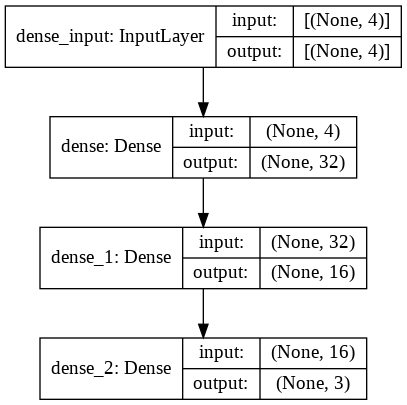

In [25]:
tf.keras.utils.plot_model(model_A, show_shapes=True)

In [26]:
model_A.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [27]:
model_A.fit(X, y, batch_size=64, epochs=25)

Epoch 1/25
3/3 [==============================] - 3s 6ms/step - loss: 1.1166 - acc: 0.1067
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0732 - acc: 0.2267
Epoch 3/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0322 - acc: 0.5733
Epoch 4/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9933 - acc: 0.6200
Epoch 5/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9579 - acc: 0.6600
Epoch 6/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9244 - acc: 0.6733
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8926 - acc: 0.6800
Epoch 8/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8627 - acc: 0.6933
Epoch 9/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8340 - acc: 0.6933
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss: 0.8058 - acc: 0.7000
Epoch 11/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7803 - acc: 0.70

## Build Functional model

Generate the PCA features from data

In [28]:
pca_model = PCA(n_components=2, random_state=4321)
X_pca = pca_model.fit_transform(X)

In [29]:
K.clear_session()

In [30]:
inp1 = Input(shape=(4,))
inp2 = Input(shape=(2,))

out1 = Dense(16, activation='relu')(inp1)
out2 = Dense(16, activation='relu')(inp2)

out = Concatenate(axis=1)([out1,out2])
out = Dense(16, activation='relu')(out)
out = Dense(3, activation='softmax')(out)

model_B = Model(inputs=[inp1, inp2], outputs=out)

In [31]:
model_B.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4)]          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 2)]          0                                            
__________________________________________________________________________________________________
dense (Dense)                   (None, 16)           80          input_1[0][0]                    
__________________________________________________________________________________________________
dense_1 (Dense)                 (None, 16)           48          input_2[0][0]                    
______________________________________________________________________________________________

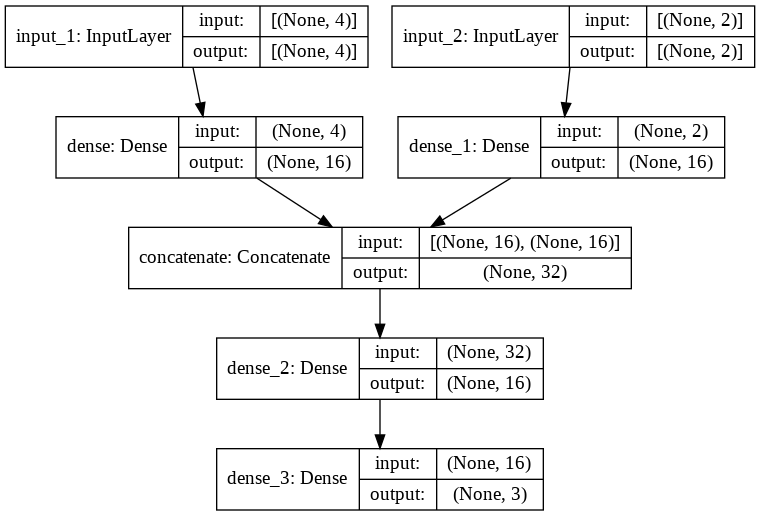

In [32]:
tf.keras.utils.plot_model(model_B, show_shapes=True)

In [33]:
model_B.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [34]:
model_B.fit([X, X_pca], y, batch_size=64, epochs=25)

Epoch 1/25
3/3 [==============================] - 1s 6ms/step - loss: 0.9483 - acc: 0.3733
Epoch 2/25
3/3 [==============================] - 0s 5ms/step - loss: 0.9014 - acc: 0.4200
Epoch 3/25
3/3 [==============================] - 0s 6ms/step - loss: 0.8534 - acc: 0.5333
Epoch 4/25
3/3 [==============================] - 0s 6ms/step - loss: 0.8119 - acc: 0.6467
Epoch 5/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7724 - acc: 0.6733
Epoch 6/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7363 - acc: 0.6800
Epoch 7/25
3/3 [==============================] - 0s 5ms/step - loss: 0.7060 - acc: 0.6733
Epoch 8/25
3/3 [==============================] - 0s 5ms/step - loss: 0.6788 - acc: 0.6800
Epoch 9/25
3/3 [==============================] - 0s 6ms/step - loss: 0.6542 - acc: 0.6933
Epoch 10/25
3/3 [==============================] - 0s 6ms/step - loss: 0.6333 - acc: 0.7067
Epoch 11/25
3/3 [==============================] - 0s 5ms/step - loss: 0.6139 - acc: 0.72

## Build Sub-classing model

In [35]:
# tf.keras.layers.Layer
class MulBiasDense(layers.Layer):
    def __init__(self, units=32, activation=None):    
        super(MulBiasDense, self).__init__()
        self.units = units
        self.activation = activation
    
    def build(self, input_shape):
        self.w = self.add_weight(shape=(input_shape[-1], self.units),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b = self.add_weight(shape=(self.units,),
                                 initializer='glorot_uniform',
                                 trainable=True)
        self.b_mul = self.add_weight(shape=(self.units,),
                                     initializer='glorot_uniform',
                                     trainable=True)
  
    def call(self, inputs):
        out = (tf.matmul(inputs, self.w) + self.b) * self.b_mul
        tf.stack
        return layers.Activation(self.activation)(out)

In [36]:
K.clear_session()

In [37]:
# Mul ( Mul ( Mul(o) )  )
inp = Input(shape=(4,))

out = MulBiasDense(units=32, activation='relu')(inp)
out = MulBiasDense(units=16, activation='relu')(out)
out = Dense(3, activation='softmax')(out)

model_C = Model(inputs=inp, outputs=out)

In [38]:
model_C.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 4)]               0         
_________________________________________________________________
mul_bias_dense (MulBiasDense (None, 32)                192       
_________________________________________________________________
mul_bias_dense_1 (MulBiasDen (None, 16)                544       
_________________________________________________________________
dense (Dense)                (None, 3)                 51        
Total params: 787
Trainable params: 787
Non-trainable params: 0
_________________________________________________________________


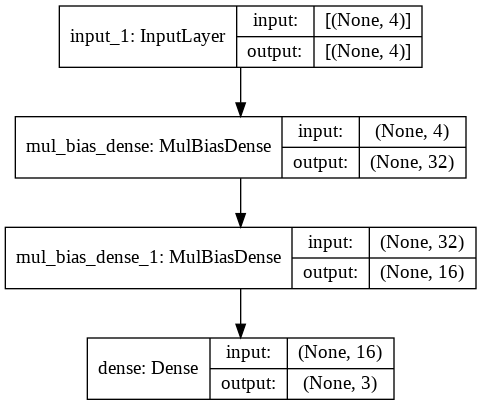

In [39]:
tf.keras.utils.plot_model(model_C, show_shapes=True)

In [40]:
model_C.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [41]:
model_C.fit(X, y, batch_size=64, epochs=25)

Epoch 1/25
3/3 [==============================] - 0s 6ms/step - loss: 1.1042 - acc: 0.3333
Epoch 2/25
3/3 [==============================] - 0s 6ms/step - loss: 1.1026 - acc: 0.3333
Epoch 3/25
3/3 [==============================] - 0s 5ms/step - loss: 1.1010 - acc: 0.3333
Epoch 4/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0994 - acc: 0.3333
Epoch 5/25
3/3 [==============================] - 0s 6ms/step - loss: 1.0978 - acc: 0.3333
Epoch 6/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0962 - acc: 0.3333
Epoch 7/25
3/3 [==============================] - 0s 6ms/step - loss: 1.0944 - acc: 0.3333
Epoch 8/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0927 - acc: 0.3333
Epoch 9/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0909 - acc: 0.3333
Epoch 10/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0888 - acc: 0.3333
Epoch 11/25
3/3 [==============================] - 0s 5ms/step - loss: 1.0868 - acc: 0.33